In [1]:
#importing prerequisite libraries and models 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt
from google.colab import drive
from sklearn import tree
import pandas as pd
import numpy as np

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#reading data_1 csv file
dataset=pd.read_csv("/content/drive/MyDrive/data_1.csv")   

In [5]:
#shape of the dataframe
dataset.shape   

(1450, 22)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#displaying dataframe
dataset   

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,132,0.006,0.000,0.006,0.003,0.0,0.0,17,2.1,0,10.4,130,68,198,6,1,141,136,140,12,0,1
1,133,0.003,0.000,0.008,0.003,0.0,0.0,16,2.1,0,13.4,130,68,198,5,1,141,135,138,13,0,1
2,134,0.003,0.000,0.008,0.003,0.0,0.0,16,2.4,0,23.0,117,53,170,11,0,137,134,137,13,1,1
3,132,0.007,0.000,0.008,0.000,0.0,0.0,16,2.4,0,19.9,117,53,170,9,0,137,136,138,11,1,1
4,131,0.005,0.072,0.008,0.003,0.0,0.0,28,1.4,0,12.9,66,88,154,5,0,135,134,137,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,150,0.000,0.000,0.001,0.000,0.0,0.0,81,0.4,17,7.1,44,130,174,2,0,152,150,151,1,0,3
1446,150,0.000,0.003,0.000,0.000,0.0,0.0,80,0.4,24,8.5,52,124,176,1,0,150,152,153,2,0,3
1447,150,0.000,0.001,0.000,0.000,0.0,0.0,84,0.3,32,6.2,20,136,156,0,0,150,150,151,1,1,3
1448,150,0.000,0.002,0.000,0.000,0.0,0.0,84,0.3,37,5.2,16,140,156,0,0,150,150,151,0,0,3


In [8]:
#separating independent and target variables
X=dataset.iloc[:,:-1]     
Y=dataset.iloc[:,-1]
Y=pd.DataFrame(Y)

In [9]:
#splitting the data into training and testing data in the ratio of 80:20
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.20,random_state=0)    

In [10]:
#dislaying counts of classes of target vairables in training data
Y_train['fetal_health'].value_counts()

1    963
2    158
3     39
Name: fetal_health, dtype: int64

In [11]:
#dislaying counts of classes of target vairables in testing data
Y_test['fetal_health'].value_counts()

1    237
2     42
3     11
Name: fetal_health, dtype: int64

In [12]:
#training the Decision Tree model
classifier=DecisionTreeClassifier(random_state=0)
classifier.fit(X_train,Y_train)
Y_test_predictions=classifier.predict(X_test)
Y_test_predictions=pd.DataFrame(Y_test_predictions)

In [13]:
#storing all feature names in the separate list
attribute_names=['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']

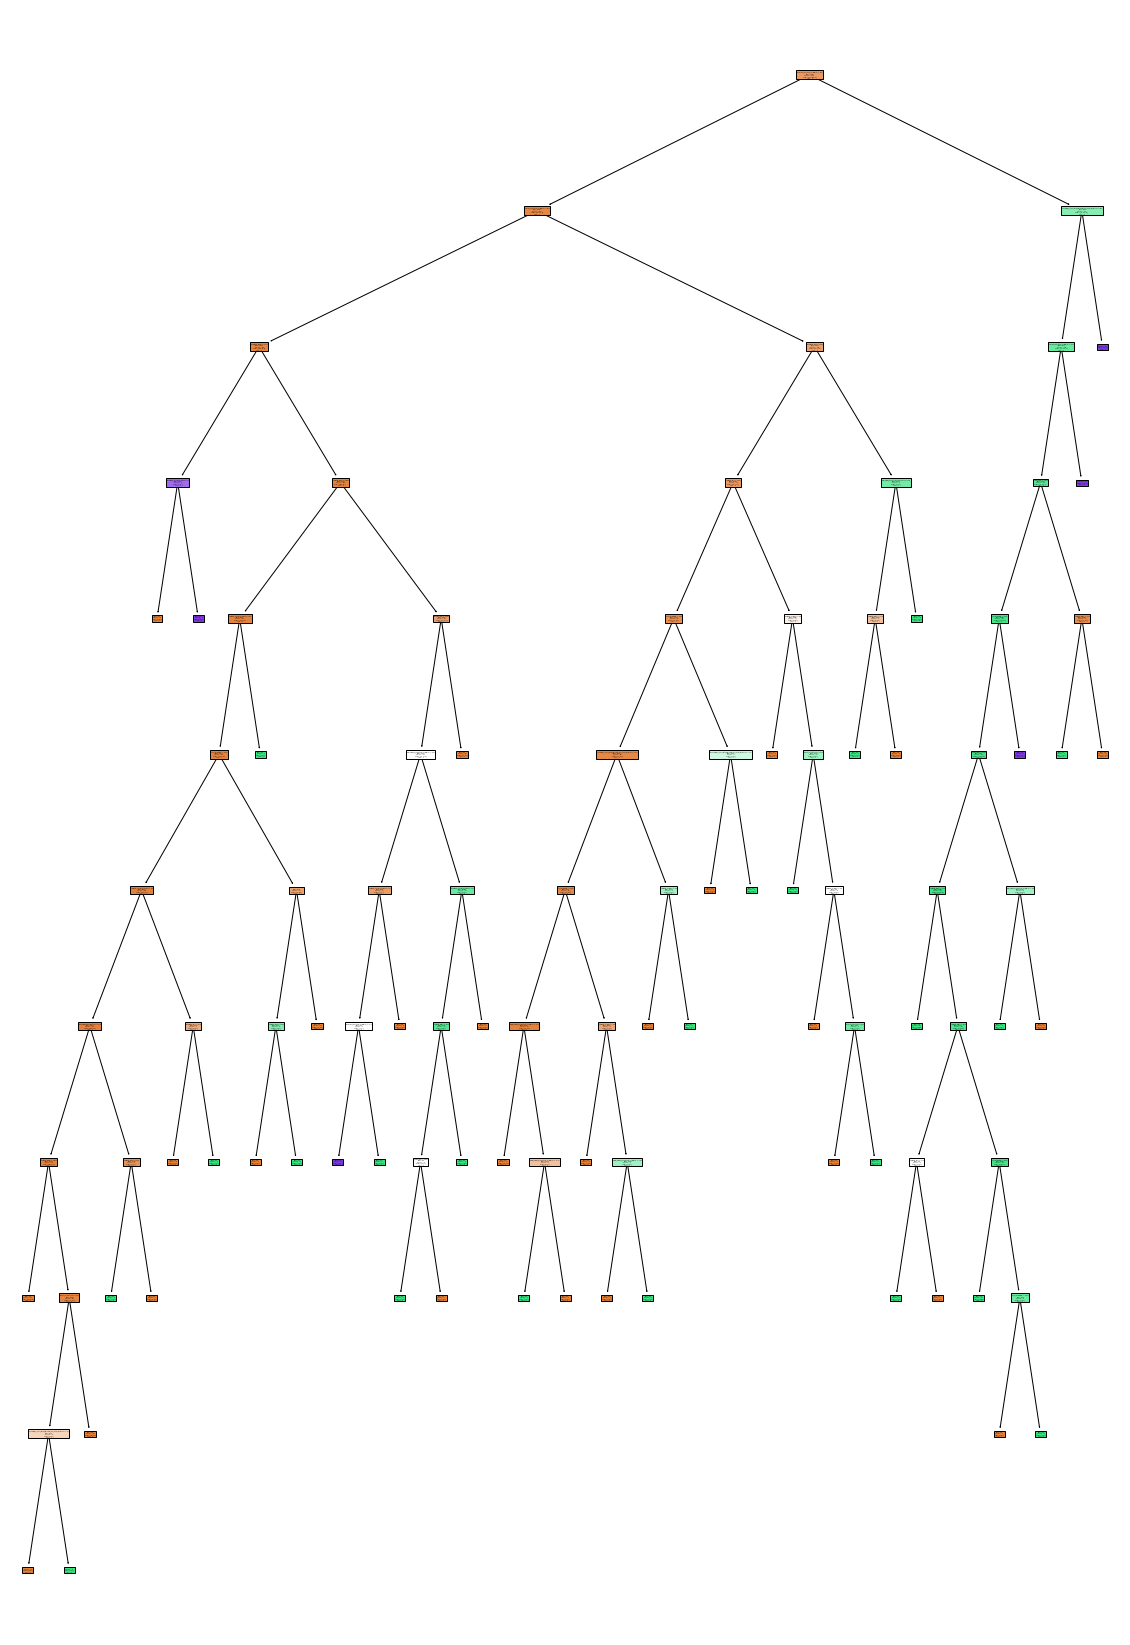

In [14]:
#-----QA-Q1-Visualizing-Decision-Tree-----

#displaying the Decision Tree
f = plt.figure(figsize=(20,30))
_ = tree.plot_tree(classifier, feature_names=attribute_names, class_names=['1','2','3'],filled=True)

Accuracy =  0.9620689655172414


Precision =  0.9620689655172414


Recall =  0.9620689655172414




Text(0, 0.5, 'True Positive rate')

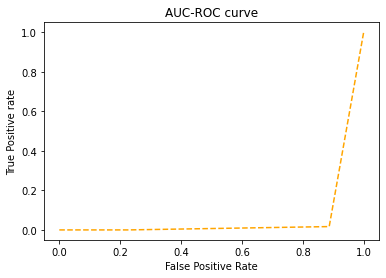

In [15]:
#-----QA-Q1-Calculating-And-Displaying-The-Evaluation-Parameters-----

# accuracy
print("Accuracy = ",accuracy_score(Y_test,Y_test_predictions))
print("\n")
# precision
print("Precision = ",precision_score(Y_test, Y_test_predictions,average='micro'))
print("\n")
#recall
print("Recall = ",recall_score(Y_test, Y_test_predictions,average='micro'))
print("\n")
#AUC-ROC curve
fpr1, tpr1, thresh1 = roc_curve(Y_test,Y_test_predictions, pos_label=1)
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.title('AUC-ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

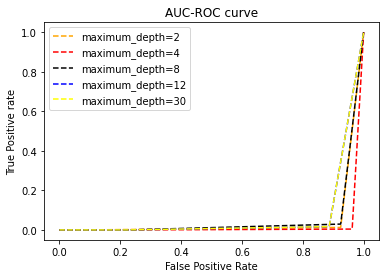

In [16]:
#---QA-Q2---Training-On-Different-Values-Of-"maximum_depths"-And-Observing-Changes-In-Evaluation-Paramters
test_accuracy=[]
maximum_depths=[2,4,8,12,30]
colors=['orange','red','black','blue','yellow']
i=0
for maximum_depth in maximum_depths:
    classifier=DecisionTreeClassifier(max_depth=maximum_depth,random_state=0)
    classifier.fit(X_train,Y_train)
    Y_test_predictions=classifier.predict(X_test)
    Y_test_predictions=pd.DataFrame(Y_test_predictions)
    test_accuracy.append(accuracy_score(Y_test,Y_test_predictions))
    #AUC-ROC curve
    fpr1, tpr1, thresh1 = roc_curve(Y_test,Y_test_predictions, pos_label=1)
    plt.plot(fpr1, tpr1, linestyle='--',color=colors[i])
    plt.title('AUC-ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(labels=['maximum_depth=2','maximum_depth=4','maximum_depth=8','maximum_depth=12','maximum_depth=30'])
    i=i+1


Text(0.5, 1.0, 'Test Accuracy vs Maximum Depth')

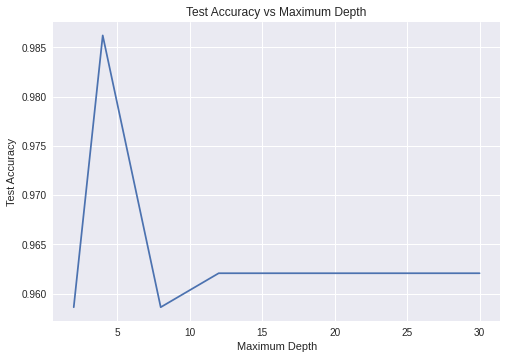

In [17]:
#----QA-Q2-Test-Acccuracy-Vs-Maximum-Depth-Graph
plt.style.use('seaborn')
x_val = maximum_depths
y_val = test_accuracy
plt.plot(x_val, y_val)
plt.xlabel('Maximum Depth')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Maximum Depth')


In [18]:
#storing the most appropriate value of "max_depth" parameter
best_depth=4

Criterion=  entropy


Accuracy =  0.9517241379310345


Precision =  0.9517241379310345


Recall =  0.9517241379310345


Criterion=  gini


Accuracy =  0.9620689655172414


Precision =  0.9620689655172414


Recall =  0.9620689655172414




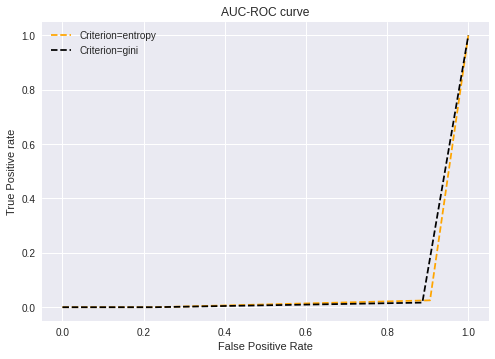

In [19]:
#----QA-Q3-Started----

#passing different values of "criteria" parameter and observing the changes in evaluation paramters
criteria=['entropy','gini']
colors=['orange','black']
i=0
for c in criteria:
    classifier=DecisionTreeClassifier(criterion=c,random_state=0)
    classifier.fit(X_train,Y_train)
    Y_test_predictions=classifier.predict(X_test)
    Y_test_predictions=pd.DataFrame(Y_test_predictions)
    test_accuracy.append(accuracy_score(Y_test,Y_test_predictions))
    print("Criterion= ",c)
    print("\n")
    # accuracy
    print("Accuracy = ",accuracy_score(Y_test,Y_test_predictions))
    print("\n")
    # precision
    print("Precision = ",precision_score(Y_test, Y_test_predictions,average='micro'))
    print("\n")
    #recall
    print("Recall = ",recall_score(Y_test, Y_test_predictions,average='micro'))
    print("\n")
    #AUC-ROC curve
    fpr1, tpr1, thresh1 = roc_curve(Y_test,Y_test_predictions, pos_label=1)
    plt.plot(fpr1, tpr1, linestyle='--',color=colors[i])
    plt.title('AUC-ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(labels=['Criterion=entropy','Criterion=gini'])
    i=i+1


In [20]:
#storing the most appropriate value of "Criterion" parameter
best_criterion='gini'

splitter=  best


Accuracy =  0.9620689655172414


Precision =  0.9620689655172414


Recall =  0.9620689655172414


splitter=  random


Accuracy =  0.9344827586206896


Precision =  0.9344827586206896


Recall =  0.9344827586206896




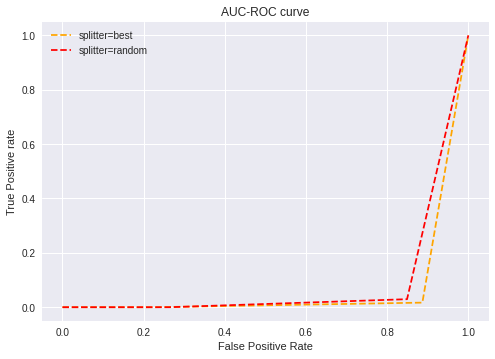

In [21]:
#passing different values of "splitter" parameter and observing the changes in evaluation paramters
splitter=['best','random']
colors=['orange','red']
i=0
for s in splitter:
    classifier=DecisionTreeClassifier(splitter=s,random_state=0)
    classifier.fit(X_train,Y_train)
    Y_test_predictions=classifier.predict(X_test)
    Y_test_predictions=pd.DataFrame(Y_test_predictions)
    test_accuracy.append(accuracy_score(Y_test,Y_test_predictions))
    print("splitter= ",s)
    print("\n")
    # accuracy
    print("Accuracy = ",accuracy_score(Y_test,Y_test_predictions))
    print("\n")
    # precision
    print("Precision = ",precision_score(Y_test, Y_test_predictions,average='micro'))
    print("\n")
    #recall
    print("Recall = ",recall_score(Y_test, Y_test_predictions,average='micro'))
    print("\n")
    #AUC-ROC curve
    fpr1, tpr1, thresh1 = roc_curve(Y_test,Y_test_predictions, pos_label=1)
    plt.plot(fpr1, tpr1, linestyle='--',color=colors[i],)
    plt.title('AUC-ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(labels=['splitter=best','splitter=random'])
    i=i+1


In [22]:
#storing the most appropriate value of "splitter" parameter
best_splitter='best'

min_samples_split=  2


Accuracy =  0.9620689655172414


Precision =  0.9620689655172414


Recall =  0.9620689655172414


min_samples_split=  6


Accuracy =  0.9517241379310345


Precision =  0.9517241379310345


Recall =  0.9517241379310345


min_samples_split=  10


Accuracy =  0.9655172413793104


Precision =  0.9655172413793104


Recall =  0.9655172413793104


min_samples_split=  15


Accuracy =  0.9620689655172414


Precision =  0.9620689655172414


Recall =  0.9620689655172414


min_samples_split=  20


Accuracy =  0.9793103448275862


Precision =  0.9793103448275862


Recall =  0.9793103448275862


min_samples_split=  25


Accuracy =  0.9827586206896551


Precision =  0.9827586206896551


Recall =  0.9827586206896551


min_samples_split=  30


Accuracy =  0.9827586206896551


Precision =  0.9827586206896551


Recall =  0.9827586206896551


min_samples_split=  40


Accuracy =  0.9827586206896551


Precision =  0.9827586206896551


Recall =  0.9827586206896551




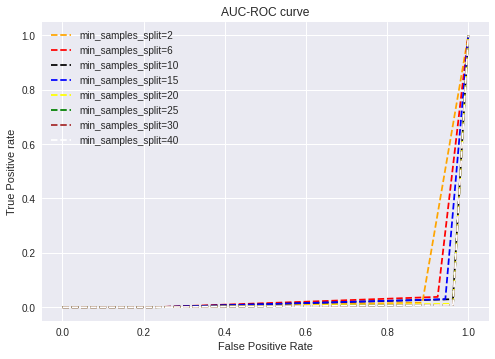

In [23]:
#passing different values of "min_samples_split" parameter and observing the changes in evaluation paramters
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
min_samples_split=[2,6,10,15,20,25,30,40]
colors=['orange','red','black','blue','yellow','green','brown','white']
i=0
for s in min_samples_split:
    classifier=DecisionTreeClassifier(min_samples_split=s,random_state=0)
    classifier.fit(X_train,Y_train)
    Y_test_predictions=classifier.predict(X_test)
    Y_test_predictions=pd.DataFrame(Y_test_predictions)
    test_accuracy.append(accuracy_score(Y_test,Y_test_predictions))

    print("min_samples_split= ",s)
    print("\n")
    # accuracy
    print("Accuracy = ",accuracy_score(Y_test,Y_test_predictions))
    print("\n")
    # precision
    print("Precision = ",precision_score(Y_test, Y_test_predictions,average='micro'))
    print("\n")
    #recall
    print("Recall = ",recall_score(Y_test, Y_test_predictions,average='micro'))
    print("\n")
    #AUC-ROC curve
    fpr1, tpr1, thresh1 = roc_curve(Y_test,Y_test_predictions, pos_label=1)
    plt.plot(fpr1, tpr1, linestyle='--',color=colors[i],)
    plt.title('AUC-ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(labels=['min_samples_split=2','min_samples_split=6','min_samples_split=10','min_samples_split=15','min_samples_split=20','min_samples_split=25','min_samples_split=30','min_samples_split=40'])
    i=i+1

In [24]:
#storing the most appropriate value of "min_samples_split" parameter
best_min_samples_split=25

max_depth=  1


Accuracy =  0.9413793103448276


Precision =  0.9413793103448276


Recall =  0.9413793103448276


max_depth=  3


Accuracy =  0.9793103448275862


Precision =  0.9793103448275862


Recall =  0.9793103448275862


max_depth=  5


Accuracy =  0.9793103448275862


Precision =  0.9793103448275862


Recall =  0.9793103448275862


max_depth=  8


Accuracy =  0.9586206896551724


Precision =  0.9586206896551724


Recall =  0.9586206896551724


max_depth=  10


Accuracy =  0.9551724137931035


Precision =  0.9551724137931035


Recall =  0.9551724137931035


max_depth=  15


Accuracy =  0.9620689655172414


Precision =  0.9620689655172414


Recall =  0.9620689655172414


max_depth=  20


Accuracy =  0.9620689655172414


Precision =  0.9620689655172414


Recall =  0.9620689655172414


max_depth=  25


Accuracy =  0.9620689655172414


Precision =  0.9620689655172414


Recall =  0.9620689655172414




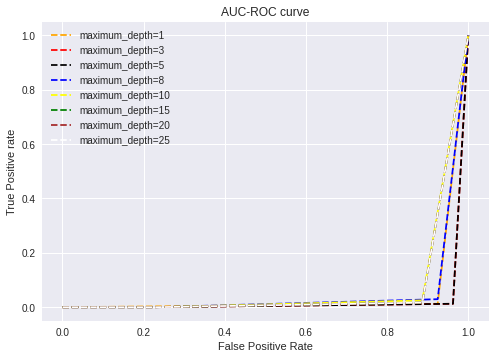

In [25]:
#passing different values of "maximum_depths" parameter and observing the changes in evaluation paramters
test_accuracy=[]
maximum_depths=[1,3,5,8,10,15,20,25]
colors=['orange','red','black','blue','yellow','green','brown','white']
i=0
for d in maximum_depths:
    classifier=DecisionTreeClassifier(max_depth=d,random_state=0)
    classifier.fit(X_train,Y_train)
    Y_test_predictions=classifier.predict(X_test)
    Y_test_predictions=pd.DataFrame(Y_test_predictions)
    
    print("max_depth= ",d)
    print("\n")
    # accuracy
    print("Accuracy = ",accuracy_score(Y_test,Y_test_predictions))
    print("\n")
    # precision
    print("Precision = ",precision_score(Y_test, Y_test_predictions,average='micro'))
    print("\n")
    #recall
    print("Recall = ",recall_score(Y_test, Y_test_predictions,average='micro'))
    print("\n")
    #AUC-ROC curve
    fpr1, tpr1, thresh1 = roc_curve(Y_test,Y_test_predictions, pos_label=1)
    plt.plot(fpr1, tpr1, linestyle='--',color=colors[i],)
    plt.title('AUC-ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(labels=['maximum_depth=1','maximum_depth=3','maximum_depth=5','maximum_depth=8','maximum_depth=10','maximum_depth=15','maximum_depth=20','maximum_depth=25'])
    i=i+1




In [26]:
#storing the most appropriate value of "max_depth" parameter
best_max_depth=3

min_samples_leaf=  1


Accuracy =  0.9620689655172414


Precision =  0.9620689655172414


Recall =  0.9620689655172414


min_samples_leaf=  3


Accuracy =  0.9655172413793104


Precision =  0.9655172413793104


Recall =  0.9655172413793104


min_samples_leaf=  5


Accuracy =  0.9655172413793104


Precision =  0.9655172413793104


Recall =  0.9655172413793104


min_samples_leaf=  7


Accuracy =  0.9655172413793104


Precision =  0.9655172413793104


Recall =  0.9655172413793104


min_samples_leaf=  11


Accuracy =  0.9724137931034482


Precision =  0.9724137931034482


Recall =  0.9724137931034482


min_samples_leaf=  20


Accuracy =  0.9620689655172414


Precision =  0.9620689655172414


Recall =  0.9620689655172414


min_samples_leaf=  30


Accuracy =  0.9482758620689655


Precision =  0.9482758620689655


Recall =  0.9482758620689655


min_samples_leaf=  40


Accuracy =  0.9310344827586207


Precision =  0.9310344827586207


Recall =  0.9310344827586207




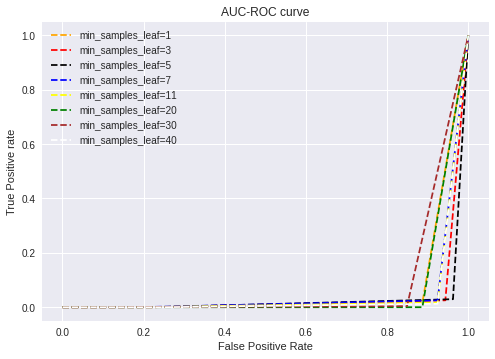

In [27]:
#passing different values of "min_samples_leaf" parameter and observing the changes in evaluation paramters
test_accuracy=[]
min_samples_leaf=[1,3,5,7,11,20,30,40]
colors=['orange','red','black','blue','yellow','green','brown','white']
i=0
for l in min_samples_leaf:
    classifier=DecisionTreeClassifier(min_samples_leaf=l,random_state=0)
    classifier.fit(X_train,Y_train)
    Y_test_predictions=classifier.predict(X_test)
    Y_test_predictions=pd.DataFrame(Y_test_predictions)
    
    print("min_samples_leaf= ",l)
    print("\n")
    # accuracy
    print("Accuracy = ",accuracy_score(Y_test,Y_test_predictions))
    print("\n")
    # precision
    print("Precision = ",precision_score(Y_test, Y_test_predictions,average='micro'))
    print("\n")
    #recall
    print("Recall = ",recall_score(Y_test, Y_test_predictions,average='micro'))
    print("\n")
    #AUC-ROC curve
    fpr1, tpr1, thresh1 = roc_curve(Y_test,Y_test_predictions, pos_label=1)
    plt.plot(fpr1, tpr1, linestyle='--',color=colors[i],)
    plt.title('AUC-ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(labels=['min_samples_leaf=1','min_samples_leaf=3','min_samples_leaf=5','min_samples_leaf=7','min_samples_leaf=11','min_samples_leaf=20','min_samples_leaf=30','min_samples_leaf=40'])
    i=i+1




In [28]:
#storing the most appropriate value of "min_samples_leaf" parameter
best_min_samples_leaf=11

max_features=  auto


Accuracy =  0.9379310344827586


Precision =  0.9379310344827586


Recall =  0.9379310344827586


max_features=  sqrt


Accuracy =  0.9379310344827586


Precision =  0.9379310344827586


Recall =  0.9379310344827586


max_features=  log2


Accuracy =  0.9379310344827586


Precision =  0.9379310344827586


Recall =  0.9379310344827586




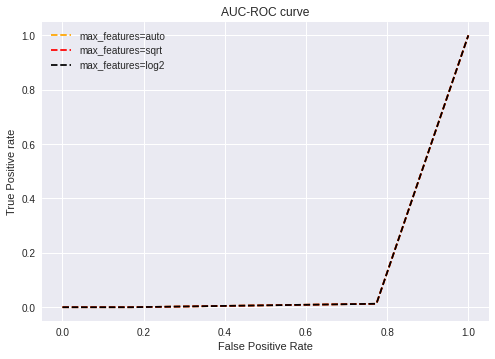

In [29]:
#passing different values of "max_features" parameter and observing the changes in evaluation paramters
test_accuracy=[]
max_features=['auto', 'sqrt', 'log2']
colors=['orange','red','black']
i=0
for f in max_features:
    classifier=DecisionTreeClassifier(max_features=f,random_state=0)
    classifier.fit(X_train,Y_train)
    Y_test_predictions=classifier.predict(X_test)
    Y_test_predictions=pd.DataFrame(Y_test_predictions)
    
    print("max_features= ",f)
    print("\n")
    # accuracy
    print("Accuracy = ",accuracy_score(Y_test,Y_test_predictions))
    print("\n")
    # precision
    print("Precision = ",precision_score(Y_test, Y_test_predictions,average='micro'))
    print("\n")
    #recall
    print("Recall = ",recall_score(Y_test, Y_test_predictions,average='micro'))
    print("\n")
    #AUC-ROC curve
    fpr1, tpr1, thresh1 = roc_curve(Y_test,Y_test_predictions, pos_label=1)
    plt.plot(fpr1, tpr1, linestyle='--',color=colors[i])
    plt.title('AUC-ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(labels=['max_features=auto','max_features=sqrt','max_features=log2'])
    i=i+1




In [30]:
#storing the most appropriate value of "max_features" parameter
best_max_features='auto'

class_weight=  balanced


Accuracy =  0.9586206896551724


Precision =  0.9586206896551724


Recall =  0.9586206896551724


class_weight=  {1: 1, 2: 5, 3: 1}


Accuracy =  0.9482758620689655


Precision =  0.9482758620689655


Recall =  0.9482758620689655


class_weight=  {1: 2, 2: 5, 3: 1}


Accuracy =  0.9379310344827586


Precision =  0.9379310344827586


Recall =  0.9379310344827586


class_weight=  {1: 1, 2: 5, 3: 2}


Accuracy =  0.9448275862068966


Precision =  0.9448275862068966


Recall =  0.9448275862068966


class_weight=  {1: 5, 2: 1, 3: 1}


Accuracy =  0.9482758620689655


Precision =  0.9482758620689655


Recall =  0.9482758620689655


class_weight=  {1: 5, 2: 2, 3: 1}


Accuracy =  0.9517241379310345


Precision =  0.9517241379310345


Recall =  0.9517241379310345


class_weight=  {1: 3, 2: 5, 3: 2}


Accuracy =  0.9413793103448276


Precision =  0.9413793103448276


Recall =  0.9413793103448276


class_weight=  {1: 7, 2: 3, 3: 1}


Accuracy =  0.9517241379310345


Pre

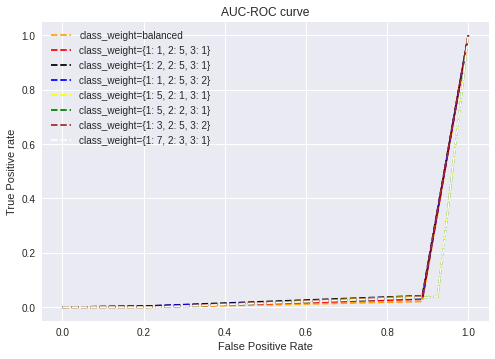

In [31]:
#passing different values of "class_weight" parameter and observing the changes in evaluation paramters
test_accuracy=[]
class_weight=['balanced',{1: 1, 2: 5, 3: 1},{1: 2, 2: 5, 3: 1},{1: 1, 2: 5, 3: 2},{1: 5, 2: 1, 3: 1},{1: 5, 2: 2, 3: 1},{1: 3, 2: 5, 3: 2},{1: 7, 2: 3, 3: 1}]
colors=['orange','red','black','blue','yellow','green','brown','white']
i=0
for w in class_weight:
    classifier=DecisionTreeClassifier(class_weight=w,random_state=0)
    classifier.fit(X_train,Y_train)
    Y_test_predictions=classifier.predict(X_test)
    Y_test_predictions=pd.DataFrame(Y_test_predictions)
    
    print("class_weight= ",w)
    print("\n")
    # accuracy
    print("Accuracy = ",accuracy_score(Y_test,Y_test_predictions))
    print("\n")
    # precision
    print("Precision = ",precision_score(Y_test, Y_test_predictions,average='micro'))
    print("\n")
    #recall
    print("Recall = ",recall_score(Y_test, Y_test_predictions,average='micro'))
    print("\n")
    #AUC-ROC curve
    fpr1, tpr1, thresh1 = roc_curve(Y_test,Y_test_predictions, pos_label=1)
    plt.plot(fpr1, tpr1, linestyle='--',color=colors[i],)
    plt.title('AUC-ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(labels=['class_weight=balanced','class_weight={1: 1, 2: 5, 3: 1}','class_weight={1: 2, 2: 5, 3: 1}','class_weight={1: 1, 2: 5, 3: 2}','class_weight={1: 5, 2: 1, 3: 1}','class_weight={1: 5, 2: 2, 3: 1}','class_weight={1: 3, 2: 5, 3: 2}','class_weight={1: 7, 2: 3, 3: 1}'])
    i=i+1

In [32]:
#storing the most appropriate value of "class_weight" parameter
best_class_weight=  'balanced'

max_leaf_nodes=  2


Accuracy =  0.9413793103448276


Precision =  0.9413793103448276


Recall =  0.9413793103448276


max_leaf_nodes=  3


Accuracy =  0.9586206896551724


Precision =  0.9586206896551724


Recall =  0.9586206896551724


max_leaf_nodes=  4


Accuracy =  0.9758620689655172


Precision =  0.9758620689655172


Recall =  0.9758620689655172


max_leaf_nodes=  5


Accuracy =  0.9827586206896551


Precision =  0.9827586206896551


Recall =  0.9827586206896551


max_leaf_nodes=  6


Accuracy =  0.9827586206896551


Precision =  0.9827586206896551


Recall =  0.9827586206896551


max_leaf_nodes=  7


Accuracy =  0.9827586206896551


Precision =  0.9827586206896551


Recall =  0.9827586206896551


max_leaf_nodes=  8


Accuracy =  0.9862068965517241


Precision =  0.9862068965517241


Recall =  0.9862068965517241


max_leaf_nodes=  11


Accuracy =  0.9862068965517241


Precision =  0.9862068965517241


Recall =  0.9862068965517241




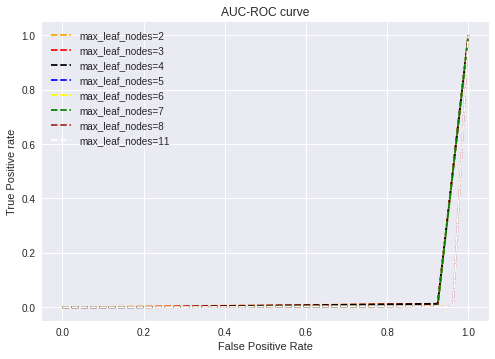

In [33]:
#passing different values of "max_leaf_nodes" parameter and observing the changes in evaluation paramters
max_leaf_nodes=[2,3,4,5,6,7,8,11]
colors=['orange','red','black','blue','yellow','green','brown','white']
i=0
for k in max_leaf_nodes:
    classifier=DecisionTreeClassifier(max_leaf_nodes=k,random_state=0)
    classifier.fit(X_train,Y_train)
    Y_test_predictions=classifier.predict(X_test)
    Y_test_predictions=pd.DataFrame(Y_test_predictions)
    test_accuracy.append(accuracy_score(Y_test,Y_test_predictions))
    
    print("max_leaf_nodes= ",k)
    print("\n")
    # accuracy
    print("Accuracy = ",accuracy_score(Y_test,Y_test_predictions))
    print("\n")
    # precision
    print("Precision = ",precision_score(Y_test, Y_test_predictions,average='micro'))
    print("\n")
    #recall
    print("Recall = ",recall_score(Y_test, Y_test_predictions,average='micro'))
    print("\n")
    #AUC-ROC curve
    fpr1, tpr1, thresh1 = roc_curve(Y_test,Y_test_predictions, pos_label=1)
    plt.plot(fpr1, tpr1, linestyle='--',color=colors[i],)
    plt.title('AUC-ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(labels=['max_leaf_nodes=2','max_leaf_nodes=3','max_leaf_nodes=4','max_leaf_nodes=5','max_leaf_nodes=6','max_leaf_nodes=7','max_leaf_nodes=8','max_leaf_nodes=11'])
    i=i+1



In [34]:
#storing the most appropriate value of "max_leaf_nodes" parameter
best_max_leaf_nodes=  8

In [35]:
#----QA-Ended----

In [37]:
#-----QB-STARTED----
classifier=DecisionTreeClassifier(criterion='gini',random_state=0)
path=classifier.cost_complexity_pruning_path(X_train,Y_train)

alphas1=path.ccp_alphas

test_accuracy1=[]
precision_score1=[]
recall_score1=[]
for alpha in alphas1:
    decisiontree_classifier=DecisionTreeClassifier(ccp_alpha=alpha,criterion='gini',random_state=0)
    decisiontree_classifier.fit(X_train,Y_train)
    Y_test_pred=decisiontree_classifier.predict(X_test)
    test_accuracy1.append(accuracy_score(Y_test,Y_test_pred))
    precision_score1.append(precision_score(Y_test, Y_test_predictions,average='micro'))
    recall_score1.append(recall_score(Y_test, Y_test_predictions,average='micro'))
   



In [39]:
#displaying accuracy
max(test_accuracy1)

0.9862068965517241

In [41]:
#displaying alpha value which is giving maximum accuracy
a=0.9862068965517241
test_accuracy1.index(a)
alphas1[23]

0.0040998656515897885

In [43]:
#displaying accuracy of for all alpha values
test_accuracy1

[0.9620689655172414,
 0.9724137931034482,
 0.9724137931034482,
 0.9724137931034482,
 0.9724137931034482,
 0.9724137931034482,
 0.9758620689655172,
 0.9758620689655172,
 0.9758620689655172,
 0.9758620689655172,
 0.9689655172413794,
 0.9689655172413794,
 0.9689655172413794,
 0.9689655172413794,
 0.9689655172413794,
 0.9655172413793104,
 0.9793103448275862,
 0.9793103448275862,
 0.9793103448275862,
 0.9793103448275862,
 0.9827586206896551,
 0.9827586206896551,
 0.9827586206896551,
 0.9862068965517241,
 0.9862068965517241,
 0.9827586206896551,
 0.9827586206896551,
 0.9827586206896551,
 0.9758620689655172,
 0.9586206896551724,
 0.9413793103448276,
 0.8172413793103448]

In [44]:
#displaying precision of for all alpha values
precision_score1

[0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241]

In [45]:
 #displaying recall of for all alpha values
 recall_score1

[0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241,
 0.9862068965517241]

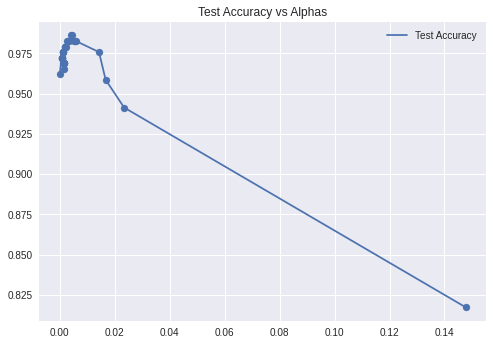

In [46]:
#plotting Test accuracy vs Alphas graph
plt.scatter(alphas1,test_accuracy1)
plt.plot(alphas1,test_accuracy1,label='Test Accuracy')
plt.legend()
plt.title('Test Accuracy vs Alphas')
plt.show()

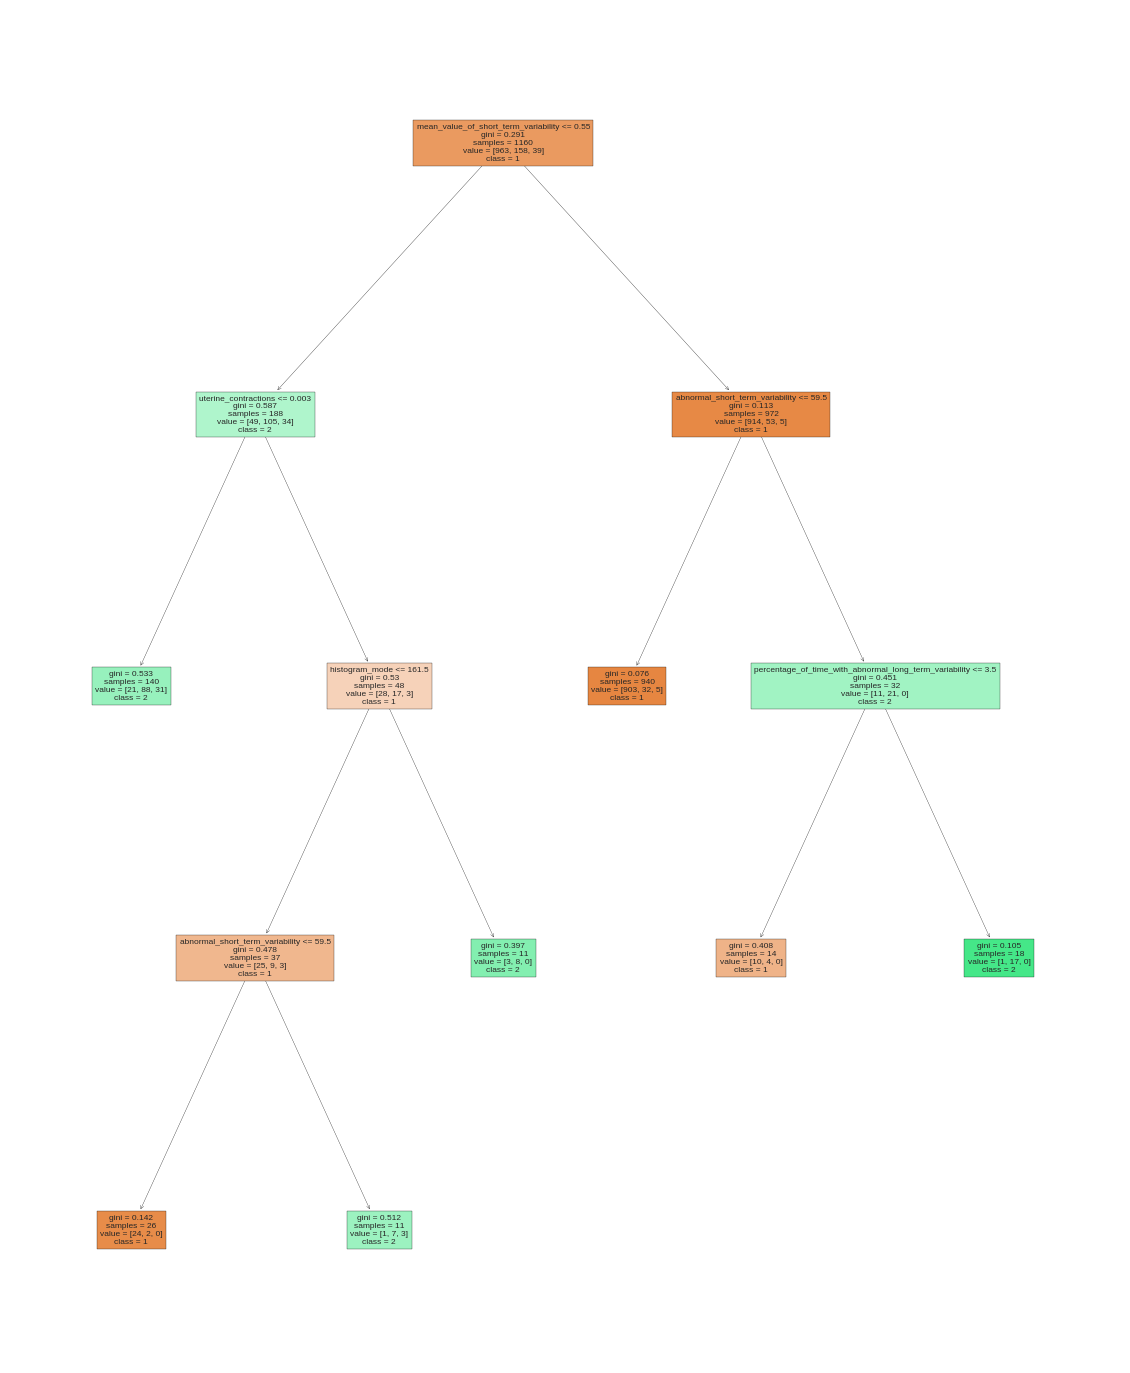

In [50]:
#training classifier on best value of alpha

#----QB-Q2-DT_B_2_CC------

decisiontree_classifier=DecisionTreeClassifier(ccp_alpha=0.0040998656515897885,max_leaf_nodes=best_max_leaf_nodes,min_samples_leaf=best_min_samples_leaf,max_features=best_max_features,splitter=best_splitter,min_samples_split=best_min_samples_split,max_depth=best_depth,criterion='gini',random_state=0)
decisiontree_classifier.fit(X_train,Y_train)
Y_test_pred=decisiontree_classifier.predict(X_test) 
plt.figure(figsize=(20,25))
attributes = dataset.columns
labels = ['1','2','3']
tree.plot_tree(decisiontree_classifier,feature_names=attributes,class_names=labels,filled=True)
plt.show()


In [51]:

cl=DecisionTreeClassifier(ccp_alpha=0.0040998656515897885,max_leaf_nodes=best_max_leaf_nodes,min_samples_leaf=best_min_samples_leaf,max_features=best_max_features,splitter=best_splitter,min_samples_split=best_min_samples_split,max_depth=best_depth,criterion='gini',random_state=0)
cl.fit(X_train,Y_train)
Y_test_predictions=cl.predict(X_test)
Y_test_predictions=pd.DataFrame(Y_test_predictions)

In [52]:

node_count = cl.tree_.node_count
left_children = cl.tree_.children_left
right_children = cl.tree_.children_right
attributes = cl.tree_.feature
limit = cl.tree_.threshold

depth_node = np.zeros(shape=node_count, dtype=np.int64)
leaf_nodes = np.zeros(shape=node_count, dtype=bool)
s = [(0, 0)]
while len(s) > 0:
    nodeidentity, nodedepth = s.pop()
    depth_node[nodeidentity] = nodedepth
    nonleaf_nodes = left_children[nodeidentity] != right_children[nodeidentity]
    if nonleaf_nodes:
        s.append((left_children[nodeidentity], nodedepth + 1))
        s.append((right_children[nodeidentity], nodedepth + 1))
    else:
        leaf_nodes[nodeidentity] = True

for j in range(node_count):
    if leaf_nodes[j]:
        print("NODE{node} is a leaf node and has depth={depth}.".format(depth=depth_node[j], node=j))
    else:
        print(" Node={node} is a non-leaf node and has depth={depth}: " "LEFT CHILD {left}  " "RIGHT CHILD {right}.".format(depth=depth_node[j],node=j,left=left_children[j],right=right_children[j]))        

 Node=0 is a non-leaf node and has depth=0: LEFT CHILD 1  RIGHT CHILD 8.
 Node=1 is a non-leaf node and has depth=1: LEFT CHILD 2  RIGHT CHILD 3.
NODE2 is a leaf node and has depth=2.
 Node=3 is a non-leaf node and has depth=2: LEFT CHILD 4  RIGHT CHILD 7.
 Node=4 is a non-leaf node and has depth=3: LEFT CHILD 5  RIGHT CHILD 6.
NODE5 is a leaf node and has depth=4.
NODE6 is a leaf node and has depth=4.
NODE7 is a leaf node and has depth=3.
 Node=8 is a non-leaf node and has depth=1: LEFT CHILD 9  RIGHT CHILD 10.
NODE9 is a leaf node and has depth=2.
 Node=10 is a non-leaf node and has depth=2: LEFT CHILD 11  RIGHT CHILD 12.
NODE11 is a leaf node and has depth=3.
NODE12 is a leaf node and has depth=3.


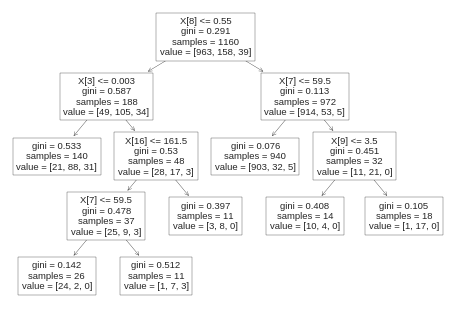

In [53]:
#Tree_Before-Removing-Random-Node
tree.plot_tree(cl)
plt.show()

In [54]:
#removing random node
for j in range(node_count):
    if leaf_nodes[j]:
      pass
    else:
       if j==3:
          left_children[j]=-1
    


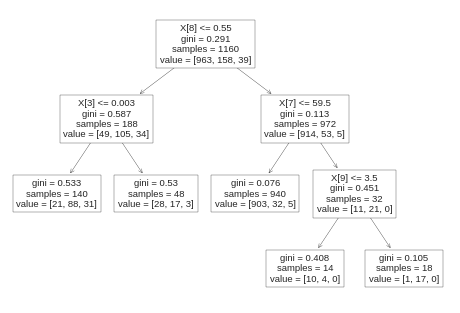

In [59]:
#----QB-Q1---DT_B_1-Tree_After-Removing-Random-Node
tree.plot_tree(cl)
plt.show()

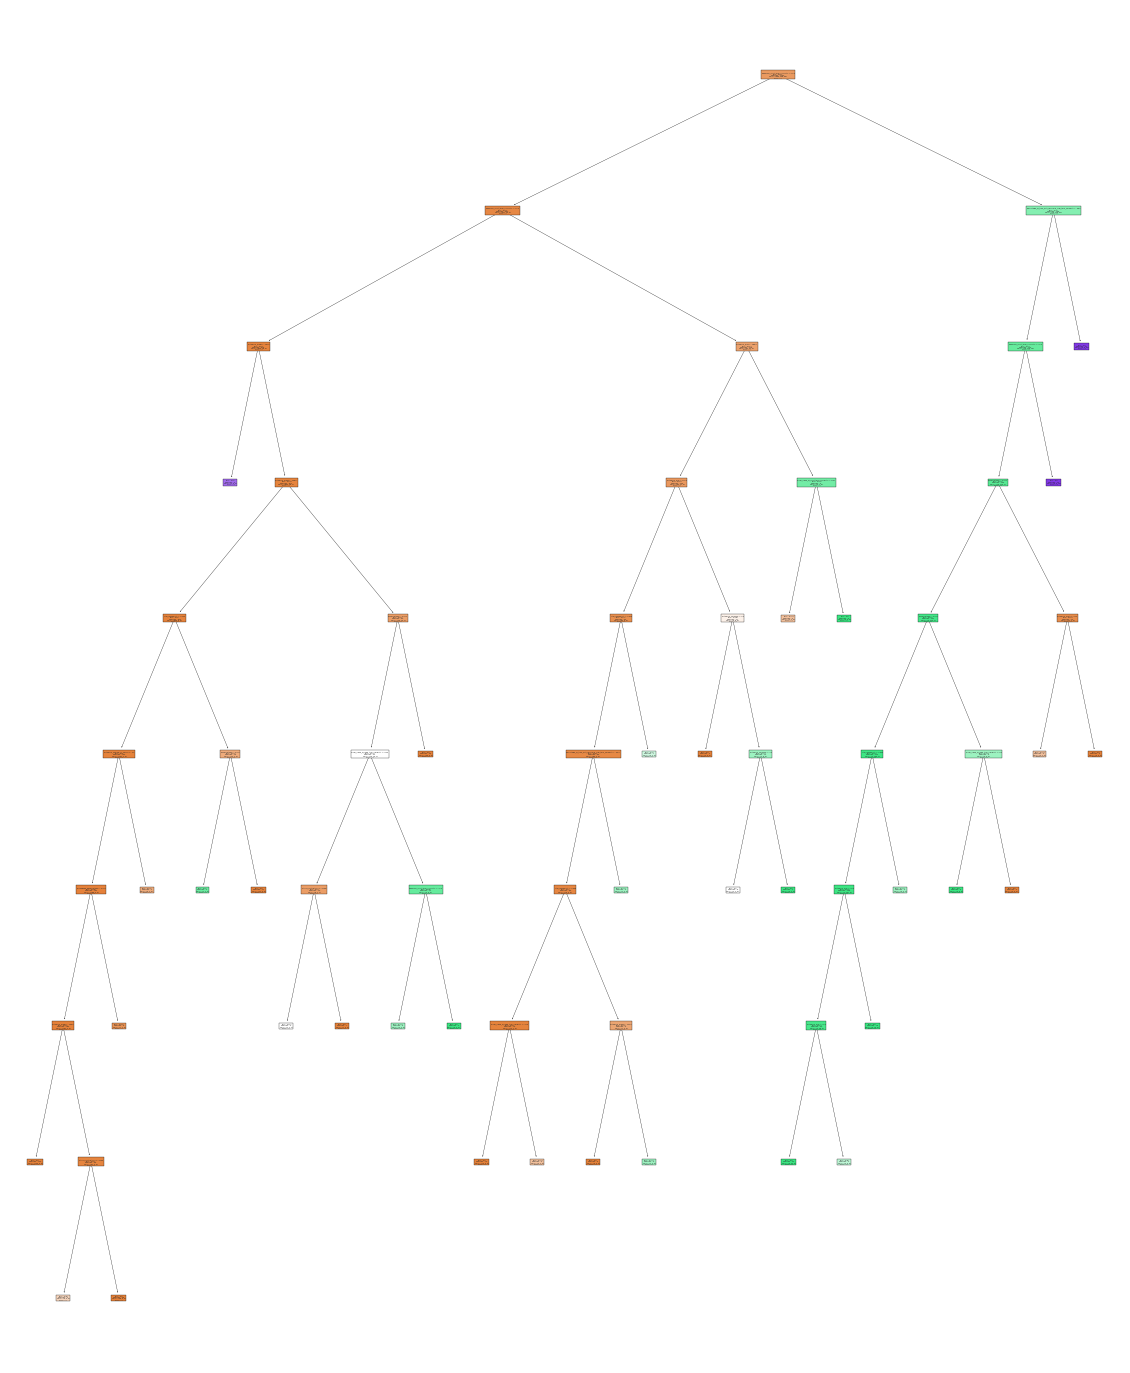

In [57]:
#----QB-Q2-DT_B_2_XX------
p = {'max_depth': [2,4,8,10,15,20,25],'min_samples_split': [6,9,15,25],'min_samples_leaf': [3,7]}
c = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=c,param_grid=p)
gcv.fit(X_train,Y_train)
m = gcv.best_estimator_
m.fit(X_train,Y_train)
Ytrain_predictions = m.predict(X_train)
Ytest_predictions = m.predict(X_test)
plt.figure(figsize=(20,25))
attributes = dataset.columns
labels = ['1','2','3']
tree.plot_tree(m,feature_names=attributes,class_names=labels,filled=True)
plt.show()


In [58]:
# accuracy
print("Accuracy = ",accuracy_score(Y_test,Ytest_predictions))
print("\n")
# precision
print("Precision = ",precision_score(Y_test, Ytest_predictions,average='micro'))
print("\n")
#recall
print("Recall = ",recall_score(Y_test, Ytest_predictions,average='micro'))
print("\n")

Accuracy =  0.9689655172413794


Precision =  0.9689655172413794


Recall =  0.9689655172413794




In [ ]:
#QB-Q2-ENDED

#QB-Q3 is in the next Code File =>FILE2.ipynb
